In [2]:
# import modules 

import torch
import torch.nn as nn 
import torchvision as tv 
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

from tqdm import tqdm

import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_mnist = pd.read_csv('/content/drive/MyDrive/train_mnist.csv')

In [5]:
train_mnist

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
!pip3 install more_itertools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:


train_mnist_formed = []
for i, row in train_mnist.iterrows():
    row = row.tolist()
    label = row[0]
    image = row[1:]
    

    total_image = []
    batches_image = np.array_split(image , 28)
    
    for i in batches_image :
      total_image.append(i)

    
    
    total_image = np.expand_dims( total_image , axis = 0 )
    total_image = torch.FloatTensor(total_image)
    image_w_label = ( total_image , label )
    train_mnist_formed.append(image_w_label)
  # prefit dataframe to view ( image , label) 

In [8]:
ds_mnist = train_mnist_formed

In [9]:
ds_mnist[0][0].shape # image in (image , label) has size 28 x 28 pixels (now tensors) , and 1 colour


torch.Size([1, 28, 28])

In [10]:
len(ds_mnist)

42000

In [11]:
ds_mnist[0][0]

tensor([[[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 188., 255.,
           94.,   0.,   0.,   0.,   0.,   0.],
     

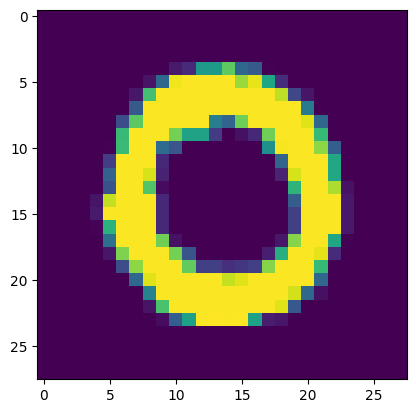

In [13]:
plt.imshow( ds_mnist[1][0].squeeze() ) #squeeze to delete the colour dimension

In [14]:
#DataLoader

batch_size = 16

dataloader = torch.utils.data.DataLoader(ds_mnist ,
                                         batch_size = batch_size ,
                                         shuffle = True , 
                                         num_workers= 0 , 
                                         drop_last = True 
                                         )



Функция активации добавляет нелинейности

In [15]:
class Neural_numbers(nn.Module):
  #Arch и ее блоки
  def __init__(self):
        
        super().__init__() 
        
        self.flat = nn.Flatten()
        self.linear1 = nn.Linear(28*28 , 512)
        self.linear2 = nn.Linear(512 , 256)
        self.linear3 = nn.Linear(256 , 128)
        self.linear4 = nn.Linear(128, 64)
        self.linear5 = nn.Linear(64 , 128)
        self.linear6 = nn.Linear( 128 , 128)
        self.linear7 = nn.Linear( 128 , 10 )

        self.act = nn.LeakyReLU()
       
  def forward(self, x): 
    out = self.flat(x)
    out = self.linear1(out)
    out = self.act(out)
    out = self.linear2(out)
    out = self.act(out)
    out = self.linear3(out)
    out = self.act(out)
    out = self.linear4(out)
    out = self.act(out)
    out = self.linear5(out)
    out = self.act(out)
    out = self.linear6(out)
    out = self.act(out)
    out = self.linear7(out)

    return out
        

        

In [16]:
model = Neural_numbers()

In [17]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW( model.parameters(), lr= 3e-4 , amsgrad = True  )

In [18]:
def accuracy(pred , label) :
    
    answer = F.softmax(pred.detach()).numpy().argmax(1)  == label.numpy().argmax(1)
    
    return answer.mean()

In [19]:
for img , label in dataloader :
  print(img)
  break  # see how the data in dataloader looks

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [20]:
epochs = 10 

for epoch in range(epochs):

  loss_val = 0 
  acc_val = 0 

  for img , label in (pbar := tqdm(dataloader)) :
    optimizer.zero_grad() 
    label = nn.functional.one_hot( label , 10 ).float() 
    pred = model(img) 

    loss = loss_fn(pred , label) 


    loss.backward() 

    loss_item = loss.item()
    loss_val += loss_item

    acc_current = accuracy(pred , label)
    acc_val  += acc_current
    optimizer.step() 

  
   
    pbar.set_description(f'loss : {loss_item:.4f}\taccuracy : {acc_current:.3f}')  
  print( f'epoch {epoch + 1 }' , f' loss_val : {loss_val / len(dataloader) }'
  , f'acc_val : {acc_val / len(dataloader)}')

  0%|          | 0/2625 [00:00<?, ?it/s]<ipython-input-18-758b855bc9b3>:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer = F.softmax(pred.detach()).numpy().argmax(1)  == label.numpy().argmax(1)
loss : 0.0601	accuracy : 1.000: 100%|██████████| 2625/2625 [00:27<00:00, 96.38it/s]


epoch 1  loss_val : 0.24657843957876877 acc_val : 0.9238095238095239


loss : 0.5756	accuracy : 0.938: 100%|██████████| 2625/2625 [00:28<00:00, 93.14it/s]


epoch 2  loss_val : 0.10354843522053922 acc_val : 0.9689761904761904


loss : 0.0198	accuracy : 1.000: 100%|██████████| 2625/2625 [00:28<00:00, 92.60it/s]


epoch 3  loss_val : 0.06798775071392966 acc_val : 0.9787619047619047


loss : 0.0002	accuracy : 1.000: 100%|██████████| 2625/2625 [00:28<00:00, 91.44it/s] 


epoch 4  loss_val : 0.050179341363353336 acc_val : 0.9842380952380952


loss : 0.0883	accuracy : 0.938: 100%|██████████| 2625/2625 [00:27<00:00, 94.13it/s]


epoch 5  loss_val : 0.034069438130673785 acc_val : 0.9890714285714286


loss : 0.0031	accuracy : 1.000: 100%|██████████| 2625/2625 [00:27<00:00, 95.30it/s] 


epoch 6  loss_val : 0.02723714930242269 acc_val : 0.9913571428571428


loss : 0.0000	accuracy : 1.000: 100%|██████████| 2625/2625 [00:28<00:00, 92.64it/s] 


epoch 7  loss_val : 0.021299958962779957 acc_val : 0.9932619047619048


loss : 0.0011	accuracy : 1.000: 100%|██████████| 2625/2625 [00:28<00:00, 92.06it/s]


epoch 8  loss_val : 0.01789537697717797 acc_val : 0.9947142857142857


loss : 0.0001	accuracy : 1.000: 100%|██████████| 2625/2625 [00:27<00:00, 94.91it/s]


epoch 9  loss_val : 0.01688644739927568 acc_val : 0.9946428571428572


loss : 0.0042	accuracy : 1.000: 100%|██████████| 2625/2625 [00:28<00:00, 93.21it/s]

epoch 10  loss_val : 0.012505000559239912 acc_val : 0.9963095238095238


In [21]:
test_mnist = pd.read_csv('/content/drive/MyDrive/test_mnist.csv')

In [22]:
test_mnist

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
test_mnist_formed = []
for i, row in test_mnist.iterrows():
    row = row.tolist()
    
    
    

    total_image = []
    batches_image = np.array_split(row , 28)
    
    for i in batches_image :
      total_image.append(i)

    
    
    total_image = np.expand_dims( total_image , axis = 0 )
    total_image = torch.FloatTensor(total_image)
    
    test_mnist_formed.append(total_image)

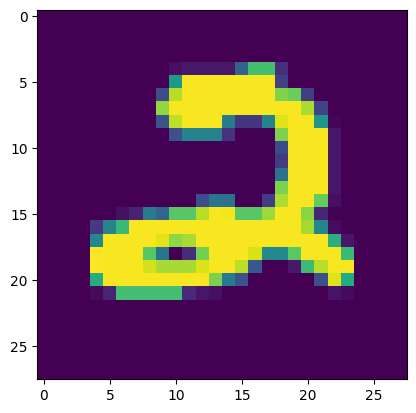

In [24]:
plt.imshow( test_mnist_formed[0][0])

In [25]:

list_of_predictions = []

for i in test_mnist_formed :
  
  
  
  nash_pred = model(i)

  prediction = F.softmax(nash_pred.detach()).numpy().argmax(1)
  prediction = prediction[0]
  
  list_of_predictions.append(prediction)

  
  




<ipython-input-25-ff4eeed2e85c>:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prediction = F.softmax(nash_pred.detach()).numpy().argmax(1)


In [ ]:
len(list_of_predictions)

28000

In [26]:
list_of_indixes = [ i for i in range(1 , 28001)]

In [ ]:
len(list_of_indixes)

28000

In [27]:
submission = pd.DataFrame({'ImageId' : list_of_indixes , 'Label' : list_of_predictions })

In [28]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [29]:
submission.to_csv( 'submission.csv' , index= False )